In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import display

## Load dataframe processed in process_protograph_data.ipynb

In [34]:
dfl = pd.read_csv('csv_dump/processed_study_results.csv').drop(columns=['Unnamed: 0'])

## Plot time distribution as a function of education, experience, and familiarity

In [18]:
group = list(set(dfl.columns).difference(set(['property','value', 'task name', 'section name', 'variable'])))
print(f'grouping data by: {group}')
data = dfl.groupby(group).mean().reset_index()

grouping data by: ['duration', 'familiarity', 'experience', 'study_id', 'education']


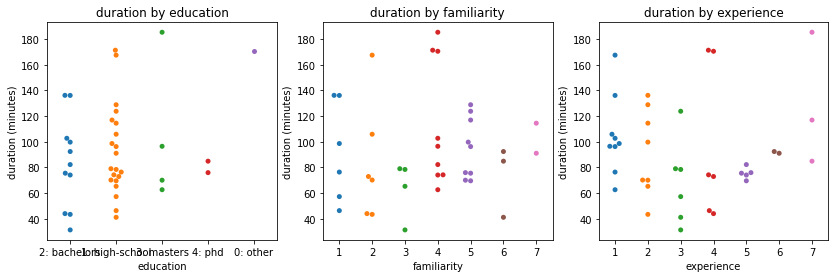

In [19]:
plot_by = ['education', 'familiarity', 'experience']
fig, axes = plt.subplots(nrows=1, ncols=len(plot_by), figsize=(14,4))

for (x_label, ax) in zip(plot_by, axes):
    ax = sns.swarmplot(x=x_label, y='duration', ax=ax, data=data)
    ax.set_ylabel('duration (minutes)')
    ax.set_title(f'duration by {x_label}')

## Average scores shown by education, experience, and familiarity

In [20]:
group = list(set(dfl.columns).difference(set(['property','value', 'task name', 'section name', 'variable'])))
print(f'grouping data by: {group}')
data = dfl.groupby(group).mean().reset_index().drop(columns=['duration'])

grouping data by: ['duration', 'familiarity', 'experience', 'study_id', 'education']


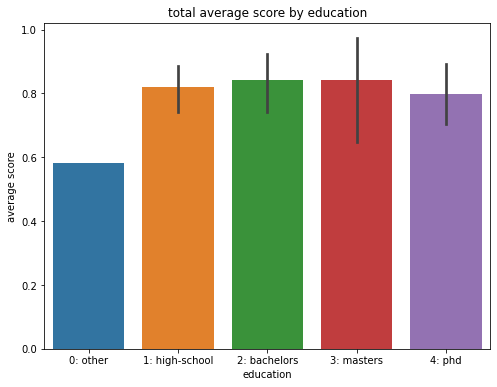

education value                                                    \
                  count      mean       std       min       25%       50%   
0        0: other   1.0  0.581081       NaN  0.581081  0.581081  0.581081   
1  1: high-school  21.0  0.819820  0.175381  0.378378  0.689189  0.891892   
2    2: bachelors  11.0  0.841523  0.166616  0.459459  0.750000  0.945946   
3      3: masters   4.0  0.841216  0.205351  0.540541  0.793919  0.925676   
4          4: phd   2.0  0.797297  0.133777  0.702703  0.750000  0.797297   

                       
        75%       max  
0  0.581081  0.581081  
1  0.959459  0.972973  
2  0.959459  0.972973  
3  0.972973  0.972973  
4  0.844595  0.891892

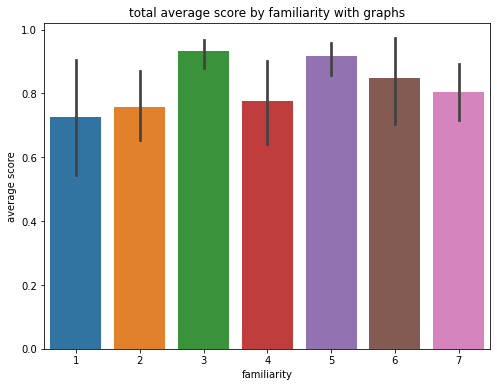

value                                                              \
            count      mean       std       min       25%       50%       75%   
familiarity                                                                     
1             6.0  0.725225  0.249714  0.378378  0.540541  0.797297  0.912162   
2             6.0  0.756757  0.151689  0.594595  0.679054  0.689189  0.861486   
3             4.0  0.932432  0.055169  0.851351  0.922297  0.952703  0.962838   
4             9.0  0.776276  0.198620  0.486486  0.581081  0.864865  0.972973   
5             9.0  0.917417  0.089752  0.689189  0.918919  0.945946  0.972973   
6             3.0  0.846847  0.136033  0.702703  0.783784  0.864865  0.918919   
7             2.0  0.804054  0.124221  0.716216  0.760135  0.804054  0.847973   

                       
                  max  
familiarity            
1            0.972973  
2            0.972973  
3            0.972973  
4            0.972973  
5            0.972973  
6            0.972973  
7            0.891892

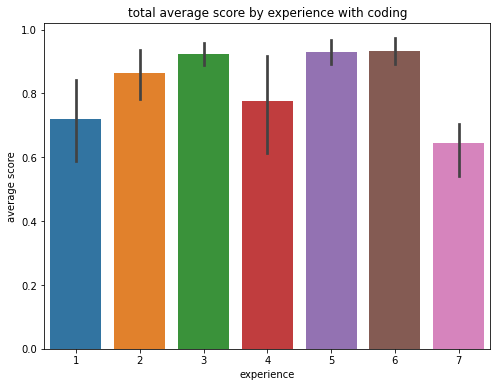

value                                                              \
           count      mean       std       min       25%       50%       75%   
experience                                                                     
1            9.0  0.719219  0.212894  0.378378  0.594595  0.716216  0.878378   
2            8.0  0.863176  0.119662  0.675676  0.766892  0.918919  0.952703   
3            6.0  0.923423  0.051753  0.851351  0.885135  0.945946  0.956081   
4            6.0  0.774775  0.217171  0.486486  0.608108  0.817568  0.966216   
5            5.0  0.929730  0.049097  0.864865  0.891892  0.945946  0.972973   
6            2.0  0.932432  0.057333  0.891892  0.912162  0.932432  0.952703   
7            3.0  0.644144  0.089977  0.540541  0.614865  0.689189  0.695946   

                      
                 max  
experience            
1           0.972973  
2           0.972973  
3           0.972973  
4           0.972973  
5           0.972973  
6           0.972973  
7           0.702703

In [21]:
#### choose plot function

plot_fnc = sns.barplot
# plot_fnc = sns.swarmplot
# plot_fnc = sns.violinplot

#### Education

order = ['0: other', '1: high-school', '2: bachelors', '3: masters', '4: phd']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax = plot_fnc(x='education', y='value', order=order, data=data, ax=ax)
ax.set_ylabel('average score')
ax.set_title('total average score by education')
plt.show()

display(data.groupby(['education']).describe().drop(columns=['familiarity','experience']).reset_index())

#### Familiarity

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax = plot_fnc(x='familiarity', y='value', data=data, ax=ax)
ax.set_ylabel('average score')
ax.set_title('total average score by familiarity with graphs')
plt.show()

display(data.groupby(['familiarity']).describe().drop(columns=['experience']))

#### Experience

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax = plot_fnc(x='experience', y='value', data=data, ax=ax)
ax.set_ylabel('average score')
ax.set_title('total average score by experience with coding')
plt.show()

display(data.groupby(['experience']).describe().drop(columns=['familiarity']))

## section scores shown by education, experience, and familiarity

In [7]:
group = list(set(dfl.columns).difference(set(['property','value', 'task name', 'variable'])))
print(f'grouping data by: {group}')
data = dfl.groupby(group).mean().reset_index().drop(columns=['duration'])

grouping data by: ['duration', 'familiarity', 'section name', 'experience', 'study_id', 'education']


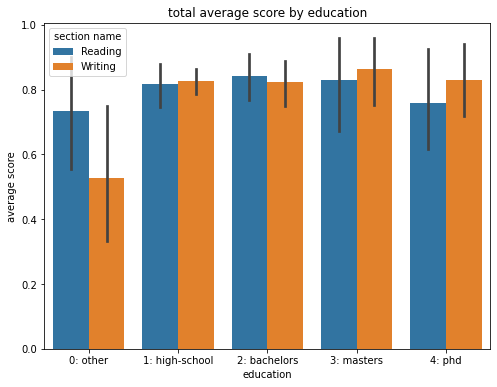

education section name value                                          \
                               count      mean       std       min       25%   
0        0: other      Reading   3.0  0.735185  0.172699  0.555556  0.652778   
1        0: other      Writing   3.0  0.527778  0.209718  0.333333  0.416667   
2  1: high-school      Reading  63.0  0.817196  0.273793  0.000000  0.725000   
3  1: high-school      Writing  63.0  0.826279  0.165597  0.375000  0.750000   
4    2: bachelors      Reading  33.0  0.843013  0.215345  0.222222  0.750000   
5    2: bachelors      Writing  33.0  0.824074  0.196868  0.250000  0.666667   
6      3: masters      Reading  12.0  0.830556  0.268444  0.250000  0.787500   
7      3: masters      Writing  12.0  0.864583  0.185596  0.500000  0.833333   
8          4: phd      Reading   6.0  0.757407  0.208512  0.500000  0.616667   
9          4: phd      Writing   6.0  0.828704  0.155572  0.666667  0.687500   

                             
        50%       75%   max  
0  0.750000  0.825000  0.90  
1  0.500000  0.625000  0.75  
2  1.000000  1.000000  1.00  
3  0.833333  1.000000  1.00  
4  1.000000  1.000000  1.00  
5  0.833333  1.000000  1.00  
6  1.000000  1.000000  1.00  
7  0.937500  1.000000  1.00  
8  0.722222  0.944444  1.00  
9  0.819444  0.972222  1.00

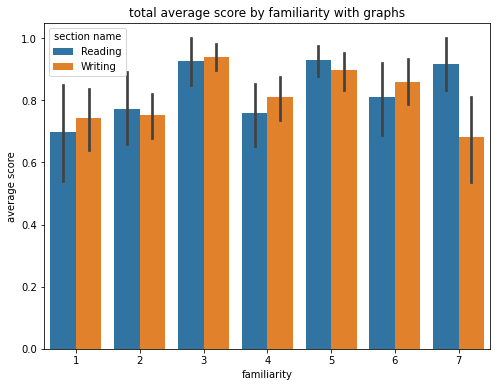

value                                          \
                         count      mean       std       min       25%   
familiarity section name                                                 
1           Reading       18.0  0.699074  0.339471  0.000000  0.550000   
            Writing       18.0  0.744599  0.213851  0.250000  0.666667   
2           Reading       18.0  0.772222  0.266510  0.277778  0.513889   
            Writing       18.0  0.751543  0.156693  0.500000  0.666667   
3           Reading       12.0  0.926389  0.134363  0.666667  0.937500   
            Writing       12.0  0.939815  0.080188  0.833333  0.833333   
4           Reading       27.0  0.759774  0.280554  0.000000  0.627778   
            Writing       27.0  0.811214  0.189977  0.333333  0.708333   
5           Reading       27.0  0.930041  0.144002  0.500000  1.000000   
            Writing       27.0  0.898663  0.155130  0.375000  0.833333   
6           Reading        9.0  0.810494  0.196780  0.500000  0.666667   
            Writing        9.0  0.858025  0.123794  0.666667  0.750000   
7           Reading        6.0  0.916667  0.129099  0.750000  0.812500   
            Writing        6.0  0.680556  0.200885  0.416667  0.520833   

                                                        
                               50%       75%       max  
familiarity section name                                
1           Reading       0.763889  1.000000  1.000000  
            Writing       0.750000  0.888889  1.000000  
2           Reading       0.916667  1.000000  1.000000  
            Writing       0.750000  0.875000  1.000000  
3           Reading       1.000000  1.000000  1.000000  
            Writing       1.000000  1.000000  1.000000  
4           Reading       0.833333  1.000000  1.000000  
            Writing       0.833333  1.000000  1.000000  
5           Reading       1.000000  1.000000  1.000000  
            Writing       1.000000  1.000000  1.000000  
6           Reading       0.777778  1.000000  1.000000  
            Writing       0.833333  1.000000  1.000000  
7           Reading       1.000000  1.000000  1.000000  
            Writing       0.750000  0.812500  0.888889

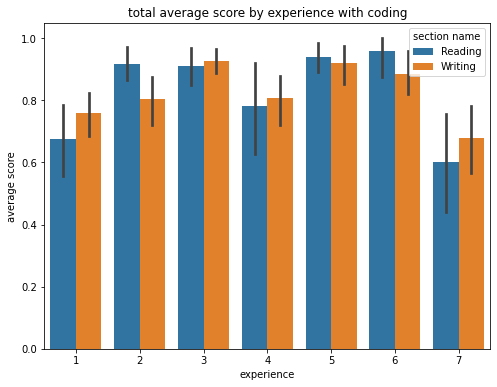

value                                          \
                        count      mean       std       min       25%   
experience section name                                                 
1          Reading       27.0  0.676337  0.300808  0.000000  0.500000   
           Writing       27.0  0.758745  0.194565  0.250000  0.666667   
2          Reading       24.0  0.918056  0.141139  0.500000  0.819444   
           Writing       24.0  0.803241  0.198274  0.416667  0.666667   
3          Reading       18.0  0.910802  0.131682  0.666667  0.756944   
           Writing       18.0  0.927469  0.089954  0.750000  0.833333   
4          Reading       18.0  0.782407  0.318027  0.000000  0.604167   
           Writing       18.0  0.807099  0.183138  0.333333  0.750000   
5          Reading       15.0  0.939444  0.094434  0.750000  0.881944   
           Writing       15.0  0.918519  0.122198  0.666667  0.833333   
6          Reading        6.0  0.958333  0.102062  0.750000  1.000000   
           Writing        6.0  0.884259  0.100026  0.750000  0.833333   
7          Reading        9.0  0.600617  0.259814  0.250000  0.500000   
           Writing        9.0  0.679012  0.189857  0.375000  0.500000   

                                                       
                              50%       75%       max  
experience section name                                
1          Reading       0.750000  1.000000  1.000000  
           Writing       0.750000  0.888889  1.000000  
2          Reading       1.000000  1.000000  1.000000  
           Writing       0.833333  1.000000  1.000000  
3          Reading       1.000000  1.000000  1.000000  
           Writing       1.000000  1.000000  1.000000  
4          Reading       1.000000  1.000000  1.000000  
           Writing       0.833333  0.972222  1.000000  
5          Reading       1.000000  1.000000  1.000000  
           Writing       1.000000  1.000000  1.000000  
6          Reading       1.000000  1.000000  1.000000  
           Writing       0.861111  0.972222  1.000000  
7          Reading       0.555556  0.666667  1.000000  
           Writing       0.666667  0.875000  0.888889

In [12]:
#### choose plot function

plot_fnc = sns.barplot
# plot_fnc = sns.swarmplot
# plot_fnc = sns.violinplot

#### Education

order = ['0: other', '1: high-school', '2: bachelors', '3: masters', '4: phd']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax = plot_fnc(x='education', y='value', hue='section name', order=order, data=data, ax=ax)
ax.set_ylabel('average score')
ax.set_title('total average score by education')
plt.show()

display(data.groupby(['education', 'section name']).describe().drop(columns=['familiarity','experience']).reset_index())

#### Familiarity

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax = plot_fnc(x='familiarity', y='value', hue='section name', data=data, ax=ax)
ax.set_ylabel('average score')
ax.set_title('total average score by familiarity with graphs')
plt.show()

display(data.groupby(['familiarity', 'section name']).describe().drop(columns=['experience']))

#### Experience

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax = plot_fnc(x='experience', y='value', hue='section name', data=data, ax=ax)
ax.set_ylabel('average score')
ax.set_title('total average score by experience with coding')
plt.show()

display(data.groupby(['experience', 'section name']).describe().drop(columns=['familiarity']))

## task scores shown by education, experience, and familiarity

In [9]:
group = list(set(dfl.columns).difference(set(['property','value', 'variable'])))
print(f'grouping data by: {group}')
data = dfl.groupby(group).mean().reset_index().drop(columns=['duration'])

grouping data by: ['duration', 'familiarity', 'section name', 'task name', 'experience', 'study_id', 'education']


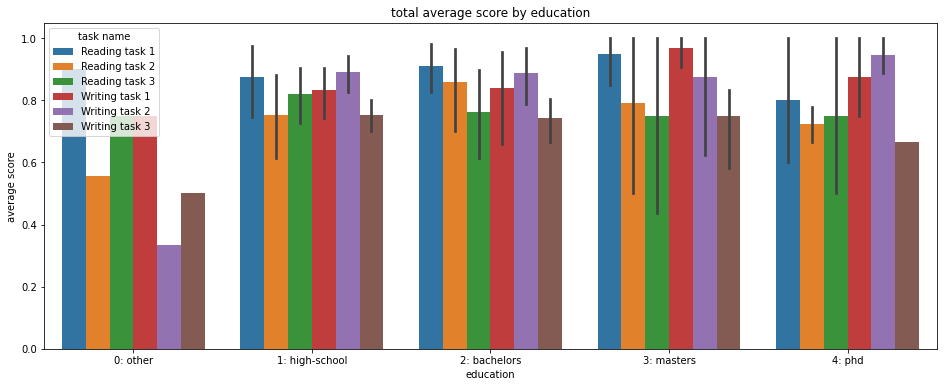

value                                          \
                              count      mean       std       min       25%   
education      task name                                                      
0: other       Reading task 1   1.0  0.900000       NaN  0.900000  0.900000   
               Reading task 2   1.0  0.555556       NaN  0.555556  0.555556   
               Reading task 3   1.0  0.750000       NaN  0.750000  0.750000   
               Writing task 1   1.0  0.750000       NaN  0.750000  0.750000   
               Writing task 2   1.0  0.333333       NaN  0.333333  0.333333   
               Writing task 3   1.0  0.500000       NaN  0.500000  0.500000   
1: high-school Reading task 1  21.0  0.876190  0.270009  0.000000  1.000000   
               Reading task 2  21.0  0.753968  0.327057  0.000000  0.555556   
               Reading task 3  21.0  0.821429  0.211289  0.500000  0.750000   
               Writing task 1  21.0  0.833333  0.194989  0.375000  0.750000   
               Writing task 2  21.0  0.891534  0.148528  0.444444  0.888889   
               Writing task 3  21.0  0.753968  0.122123  0.416667  0.666667   
2: bachelors   Reading task 1  11.0  0.909091  0.130035  0.700000  0.800000   
               Reading task 2  11.0  0.858586  0.234867  0.222222  0.805556   
               Reading task 3  11.0  0.761364  0.252825  0.250000  0.625000   
               Writing task 1  11.0  0.840909  0.256728  0.250000  0.750000   
               Writing task 2  11.0  0.888889  0.180876  0.555556  0.805556   
               Writing task 3  11.0  0.742424  0.114592  0.500000  0.666667   
3: masters     Reading task 1   4.0  0.950000  0.100000  0.800000  0.950000   
               Reading task 2   4.0  0.791667  0.315495  0.333333  0.708333   
               Reading task 3   4.0  0.750000  0.353553  0.250000  0.625000   
               Writing task 1   4.0  0.968750  0.062500  0.875000  0.968750   
               Writing task 2   4.0  0.875000  0.250000  0.500000  0.875000   
               Writing task 3   4.0  0.750000  0.166667  0.500000  0.750000   
4: phd         Reading task 1   2.0  0.800000  0.282843  0.600000  0.700000   
               Reading task 2   2.0  0.722222  0.078567  0.666667  0.694444   
               Reading task 3   2.0  0.750000  0.353553  0.500000  0.625000   
               Writing task 1   2.0  0.875000  0.176777  0.750000  0.812500   
               Writing task 2   2.0  0.944444  0.078567  0.888889  0.916667   
               Writing task 3   2.0  0.666667  0.000000  0.666667  0.666667   

                                                             
                                    50%       75%       max  
education      task name                                     
0: other       Reading task 1  0.900000  0.900000  0.900000  
               Reading task 2  0.555556  0.555556  0.555556  
               Reading task 3  0.750000  0.750000  0.750000  
               Writing task 1  0.750000  0.750000  0.750000  
               Writing task 2  0.333333  0.333333  0.333333  
               Writing task 3  0.500000  0.500000  0.500000  
1: high-school Reading task 1  1.000000  1.000000  1.000000  
               Reading task 2  1.000000  1.000000  1.000000  
               Reading task 3  1.000000  1.000000  1.000000  
               Writing task 1  0.750000  1.000000  1.000000  
               Writing task 2  0.888889  1.000000  1.000000  
               Writing task 3  0.833333  0.833333  0.833333  
2: bachelors   Reading task 1  1.000000  1.000000  1.000000  
               Reading task 2  1.000000  1.000000  1.000000  
               Reading task 3  0.750000  1.000000  1.000000  
               Writing task 1  1.000000  1.000000  1.000000  
               Writing task 2  1.000000  1.000000  1.000000  
               Writing task 3  0.833333  0.833333  0.833333  
3: masters     Reading task 1  1.000000  1.000000  1.000000  
               Reading task 2  0.916667  1.000000  1.00000

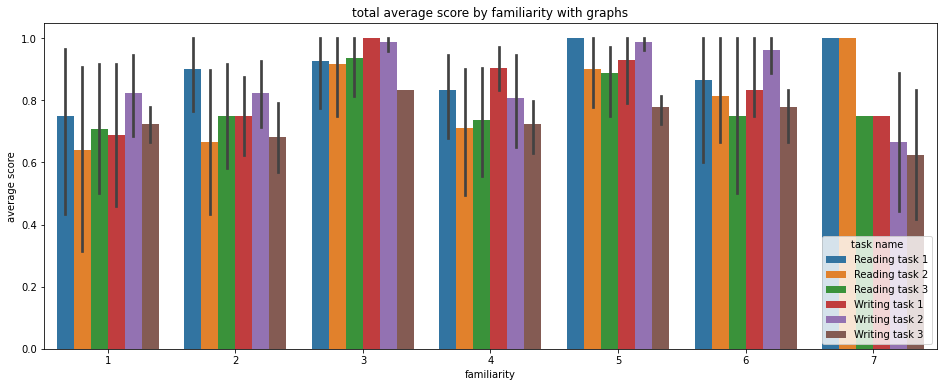

value                                          \
                           count      mean       std       min       25%   
familiarity task name                                                      
1           Reading task 1   6.0  0.750000  0.388587  0.000000  0.725000   
            Reading task 2   6.0  0.638889  0.384499  0.111111  0.347222   
            Reading task 3   6.0  0.708333  0.292261  0.250000  0.562500   
            Writing task 1   6.0  0.687500  0.313748  0.250000  0.468750   
            Writing task 2   6.0  0.824074  0.193782  0.555556  0.680556   
            Writing task 3   6.0  0.722222  0.086066  0.666667  0.666667   
2           Reading task 1   6.0  0.900000  0.167332  0.600000  0.850000   
            Reading task 2   6.0  0.666667  0.323942  0.277778  0.388889   
            Reading task 3   6.0  0.750000  0.273861  0.500000  0.500000   
            Writing task 1   6.0  0.750000  0.158114  0.500000  0.750000   
            Writing task 2   6.0  0.824074  0.150787  0.611111  0.722222   
            Writing task 3   6.0  0.680556  0.152904  0.500000  0.541667   
3           Reading task 1   4.0  0.925000  0.150000  0.700000  0.925000   
            Reading task 2   4.0  0.916667  0.166667  0.666667  0.916667   
            Reading task 3   4.0  0.937500  0.125000  0.750000  0.937500   
            Writing task 1   4.0  1.000000  0.000000  1.000000  1.000000   
            Writing task 2   4.0  0.986111  0.027778  0.944444  0.986111   
            Writing task 3   4.0  0.833333  0.000000  0.833333  0.833333   
4           Reading task 1   9.0  0.833333  0.229129  0.300000  0.800000   
            Reading task 2   9.0  0.709877  0.348916  0.000000  0.555556   
            Reading task 3   9.0  0.736111  0.268419  0.250000  0.500000   
            Writing task 1   9.0  0.902778  0.121478  0.750000  0.750000   
            Writing task 2   9.0  0.808642  0.251709  0.333333  0.666667   
            Writing task 3   9.0  0.722222  0.144338  0.500000  0.666667   
5           Reading task 1   9.0  1.000000  0.000000  1.000000  1.000000   
            Reading task 2   9.0  0.901235  0.161441  0.555556  0.777778   
            Reading task 3   9.0  0.888889  0.181621  0.500000  0.750000   
            Writing task 1   9.0  0.930556  0.208333  0.375000  1.000000   
            Writing task 2   9.0  0.987654  0.037037  0.888889  1.000000   
            Writing task 3   9.0  0.777778  0.083333  0.666667  0.666667   
6           Reading task 1   3.0  0.866667  0.230940  0.600000  0.800000   
            Reading task 2   3.0  0.814815  0.169725  0.666667  0.722222   
            Reading task 3   3.0  0.750000  0.250000  0.500000  0.625000   
            Writing task 1   3.0  0.833333  0.144338  0.750000  0.750000   
            Writing task 2   3.0  0.962963  0.064150  0.888889  0.944444   
            Writing task 3   3.0  0.777778  0.096225  0.666667  0.750000   
7           Reading task 1   2.0  1.000000  0.000000  1.000000  1.000000   
            Reading task 2   2.0  1.000000  0.000000  1.000000  1.000000   
            Reading task 3   2.0  0.750000  0.000000  0.750000  0.750000   
            Writing task 1   2.0  0.750000  0.000000  0.750000  0.750000   
            Writing task 2   2.0  0.666667  0.314270  0.444444  0.555556   
            Writing task 3   2.0  0.625000  0.294628  0.416667  0.520833   

                                                          
                                 50%       75%       max  
familiarity task name                                     
1           Reading task 1  0.900000  1.000000  1.000000  
            Reading task 2  0.750000  0.944444  1.000000  
            Reading task 3  0.750000  0.937500  1.000000  
            Writing task 1  0.750000  0.937500  1.000000  
            Writing task 2  0.888889  0.972222  1.000000  
            Writing task 3  0.666667  0.791667  0.833333  
2           Reading task 1  1.000000  1.000000  1.000000  
            Read

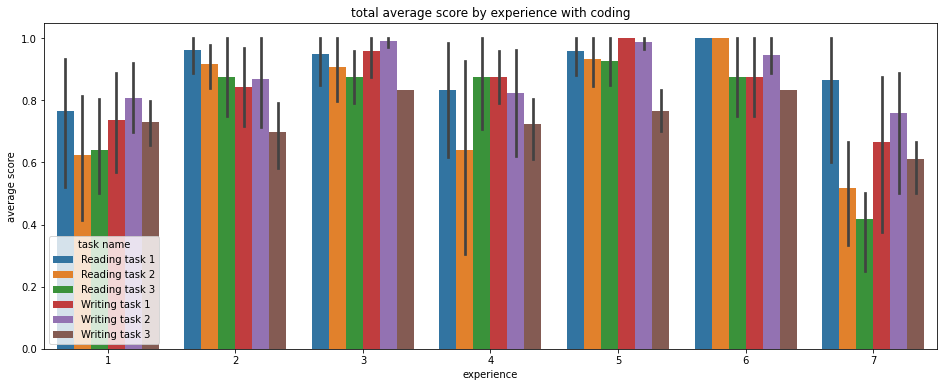

value                                          \
                          count      mean       std       min       25%   
experience task name                                                      
1          Reading task 1   9.0  0.766667  0.324037  0.000000  0.700000   
           Reading task 2   9.0  0.623457  0.333076  0.111111  0.333333   
           Reading task 3   9.0  0.638889  0.253448  0.250000  0.500000   
           Writing task 1   9.0  0.736111  0.268419  0.250000  0.750000   
           Writing task 2   9.0  0.808642  0.182386  0.555556  0.666667   
           Writing task 3   9.0  0.731481  0.116203  0.500000  0.666667   
2          Reading task 1   8.0  0.962500  0.106066  0.700000  1.000000   
           Reading task 2   8.0  0.916667  0.118783  0.722222  0.819444   
           Reading task 3   8.0  0.875000  0.188982  0.500000  0.750000   
           Writing task 1   8.0  0.843750  0.186006  0.500000  0.750000   
           Writing task 2   8.0  0.868056  0.218092  0.444444  0.819444   
           Writing task 3   8.0  0.697917  0.166294  0.416667  0.625000   
3          Reading task 1   6.0  0.950000  0.122474  0.700000  1.000000   
           Reading task 2   6.0  0.907407  0.147684  0.666667  0.833333   
           Reading task 3   6.0  0.875000  0.136931  0.750000  0.750000   
           Writing task 1   6.0  0.958333  0.102062  0.750000  1.000000   
           Writing task 2   6.0  0.990741  0.022680  0.944444  1.000000   
           Writing task 3   6.0  0.833333  0.000000  0.833333  0.833333   
4          Reading task 1   6.0  0.833333  0.273252  0.300000  0.825000   
           Reading task 2   6.0  0.638889  0.432834  0.000000  0.347222   
           Reading task 3   6.0  0.875000  0.209165  0.500000  0.812500   
           Writing task 1   6.0  0.875000  0.136931  0.750000  0.750000   
           Writing task 2   6.0  0.824074  0.249485  0.333333  0.847222   
           Writing task 3   6.0  0.722222  0.136083  0.500000  0.666667   
5          Reading task 1   5.0  0.960000  0.089443  0.800000  1.000000   
           Reading task 2   5.0  0.933333  0.099381  0.777778  0.888889   
           Reading task 3   5.0  0.925000  0.111803  0.750000  0.875000   
           Writing task 1   5.0  1.000000  0.000000  1.000000  1.000000   
           Writing task 2   5.0  0.988889  0.024845  0.944444  1.000000   
           Writing task 3   5.0  0.766667  0.091287  0.666667  0.666667   
6          Reading task 1   2.0  1.000000  0.000000  1.000000  1.000000   
           Reading task 2   2.0  1.000000  0.000000  1.000000  1.000000   
           Reading task 3   2.0  0.875000  0.176777  0.750000  0.812500   
           Writing task 1   2.0  0.875000  0.176777  0.750000  0.812500   
           Writing task 2   2.0  0.944444  0.078567  0.888889  0.916667   
           Writing task 3   2.0  0.833333  0.000000  0.833333  0.833333   
7          Reading task 1   3.0  0.866667  0.230940  0.600000  0.800000   
           Reading task 2   3.0  0.518519  0.169725  0.333333  0.444444   
           Reading task 3   3.0  0.416667  0.144338  0.250000  0.375000   
           Writing task 1   3.0  0.666667  0.260208  0.375000  0.562500   
           Writing task 2   3.0  0.759259  0.224525  0.500000  0.694444   
           Writing task 3   3.0  0.611111  0.096225  0.500000  0.583333   

                                                         
                                50%       75%       max  
experience task name                                     
1          Reading task 1  0.800000  1.000000  1.000000  
           Reading task 2  0.777778  0.833333  1.000000  
           Reading task 3  0.500000  0.750000  1.000000  
           Writing task 1  0.750000  1.000000  1.000000  
           Writing task 2  0.888889  1.000000  1.000000  
           Writing task 3  0.750000  0.833333  0.833333  
2          Reading task 1  1.000000  1.000000  1.000000  
           Reading task 2  1.000000  1.000000  1.000000  
           R

In [10]:
#### choose plot function

plot_fnc = sns.barplot
# plot_fnc = sns.swarmplot
# plot_fnc = sns.violinplot

#### Education

order = ['0: other', '1: high-school', '2: bachelors', '3: masters', '4: phd']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
ax = plot_fnc(x='education', y='value', hue='task name', order=order, data=data, ax=ax)
ax.set_ylabel('average score')
ax.set_title('total average score by education')
plt.show()

display(data.groupby(['education', 'task name']).describe().drop(columns=['familiarity','experience']))

#### Familiarity

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
ax = plot_fnc(x='familiarity', y='value', hue='task name', data=data, ax=ax)
ax.set_ylabel('average score')
ax.set_title('total average score by familiarity with graphs')
plt.show()

display(data.groupby(['familiarity', 'task name']).describe().drop(columns=['experience']))

#### Experience

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
ax = plot_fnc(x='experience', y='value', hue='task name', data=data, ax=ax)
ax.set_ylabel('average score')
ax.set_title('total average score by experience with coding')
plt.show()

display(data.groupby(['experience', 'task name']).describe().drop(columns=['familiarity']))

## look at docs events (in progress)

In [114]:
df = pd.read_csv('csv_dump/study_docs_events.csv').drop(columns=['Unnamed: 0'])
df = df[df['study_id'].isin(dfl['db_id'])].copy()

In [115]:
df.groupby(['location']).count()

,id,study_id,action,page,position,created_at
location,,,,,,
3: active-training,397,397,397,238,397,397
4: trial,399,399,399,320,399,399
5: sketch-to-code,1256,1256,1256,1069,1256,1256
6: code-to-sketch-training,1,1,1,0,1,1
7: code-to-sketch,116,116,116,74,116,116
8: build-your-own,198,198,198,147,198,198


## lines of code in writing tasks

In [121]:
def count_lines(s):
    # remove blank spaces
    s = s.replace(' ', '')
    # return # of lines with content
    return len([line for line in s.split('\n') if len(line)>0])

In [122]:
survey = pd.read_csv('csv_dump/study_survey_questions.csv').drop(columns=['Unnamed: 0'])
survey = survey[survey['study_id'].isin(dfl['db_id'])].sort_values('study_id').copy()

In [123]:
# get all writing tasks into a single frame
dfs = []
for taskn in [1,2,3]:
    df = pd.read_csv(f'csv_dump/study_part1_task{taskn}.csv').drop(columns=['Unnamed: 0'])
    df['task name'] = f'writing task {taskn}'
    # remove entries not in the final study
    df = df[df['study_id'].isin(dfl['db_id'])].sort_values('study_id').copy()
    assert all(df['study_id'].values == survey['study_id'].values)
    df['eductation'] = survey['education']
    df['familiarity'] = survey['familiarity']
    df['experience'] = survey['experience']
    dfs.append(df)
    

df = pd.concat(dfs)
df['line count'] = df['code'].apply(count_lines)

In [124]:
df.groupby(['task name', 'experience']).describe()

duration                                          \
                             count         mean         std    min     25%   
task name      experience                                                    
writing task 1 1.0             5.0  1018.800000  787.992513  249.0  317.00   
               2.0             4.0   945.000000  778.737440  489.0  525.00   
               3.0             2.0   671.500000  436.284884  363.0  517.25   
               4.0             4.0   334.500000  227.309627   87.0  209.25   
               5.0             2.0   564.500000  111.015765  486.0  525.25   
               7.0             2.0   358.500000   89.802561  295.0  326.75   
writing task 2 1.0             5.0   423.600000  128.059752  196.0  467.00   
               2.0             4.0   814.750000  227.772364  547.0  692.50   
               3.0             5.0   604.200000  281.924103  373.0  407.00   
               4.0             4.0   647.750000  274.015054  368.0  494.75   
               5.0             3.0   663.666667  604.308972  293.0  315.00   
               7.0             3.0  1050.666667  683.942493  572.0  659.00   
writing task 3 1.0             5.0   345.800000  215.878901  101.0  270.00   
               2.0             4.0   312.500000  187.429098  149.0  168.50   
               3.0             4.0   406.000000  107.990740  255.0  377.25   
               4.0             5.0   617.800000  370.843902  230.0  344.00   
               5.0             3.0   746.666667  471.071474  295.0  502.50   
               7.0             3.0   341.000000  252.766691  176.0  195.50   

                                                  familiarity            ...  \
                             50%      75%     max       count      mean  ...   
task name      experience                                                ...   
writing task 1 1.0         849.0  1733.00  1946.0         5.0  2.400000  ...   
               2.0         591.0  1011.00  2109.0         4.0  4.750000  ...   
               3.0         671.5   825.75   980.0         2.0  4.500000  ...   
               4.0         312.5   437.75   626.0         4.0  3.000000  ...   
               5.0         564.5   603.75   643.0         2.0  4.500000  ...   
               7.0         358.5   390.25   422.0         2.0  4.500000  ...   
writing task 2 1.0         470.0   481.00   504.0         5.0  2.400000  ...   
               2.0         813.0   935.25  1086.0         4.0  4.000000  ...   
               3.0         559.0   605.00  1077.0         5.0  3.200000  ...   
               4.0         604.5   757.50  1014.0         4.0  3.000000  ...   
               5.0         337.0   849.00  1361.0         3.0  5.000000  ...   
               7.0         746.0  1290.00  1834.0         3.0  5.000000  ...   
writing task 3 1.0         284.0   389.00   685.0         5.0  2.400000  ...   
               2.0         276.5   420.50   548.0         4.0  4.000000  ...   
               3.0         429.5   458.25   510.0         4.0  2.500000  ...   
               4.0         607.0   732.00  1176.0         5.0  3.200000  ...   
               5.0         710.0   972.50  1235.0         3.0  4.666667  ...   
               7.0         215.0   423.50   632.0         3.0  5.000000  ...   

                                     line count                              \
                            75%  max      count       mean        std   min   
task name      experience                                                     
writing task 1 1.0         4.00  4.0        5.0  10.600000   3.507136   7.0   
               2.0         5.50  7.0        4.0   9.000000   0.816497   8.0   
               3.0         5.25  6.0        2.0   8.500000   0.707107   8.0   
               4.0         4.00  4.0        4.0  12.250000   5.965177   8.0   
               5.0         4.75  5.0        2.0   8.000000   0.000000   8.0   
               7.0         4.75  5.0        2.0  11.000000   2.828427   9.

<AxesSubplot:xlabel='task name', ylabel='line count'>

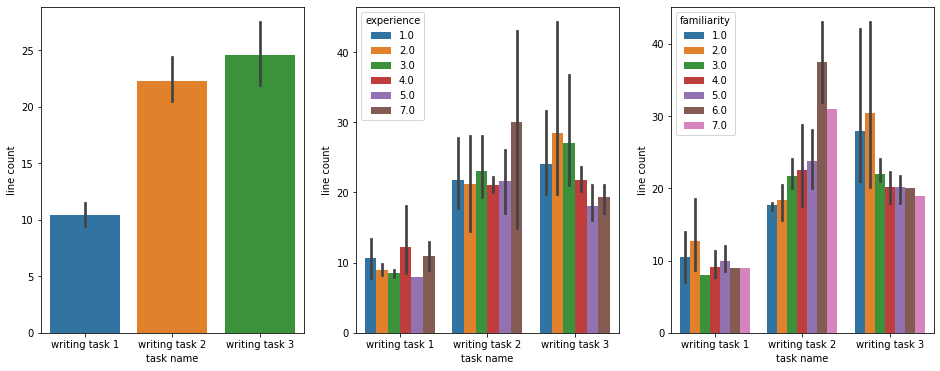

In [125]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

sns.barplot(x='task name', y='line count', ax=ax1, data=df)
sns.barplot(x='task name', y='line count', hue='experience', ax=ax2, data=df)
sns.barplot(x='task name', y='line count', hue='familiarity', ax=ax3, data=df)


In [126]:
df.to_csv('csv_dump/writing_line_count.csv')